In [0]:
import pandas as pd

df = pd.read_csv("DataSet.csv")

In [4]:
df

,Profile Pic,Full Name Words,Nums/Length Fullname,Bio Length,External Url,Private,Verified,Business,#Posts,#Followers,#Following,Delta,Fake
0,1,2,0.0,42,1,0,0,0,102,678,405,273,0
1,1,2,0.0,0,0,0,0,0,58,334,434,-100,0
2,1,0,0.0,0,0,0,0,0,44,539,364,175,0
3,1,2,0.0,14,0,0,0,0,188,3098,286,2812,0
4,1,2,0.0,0,0,0,0,1,496,1079,1979,-900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,2,0.0,2,0,1,0,0,8,661,1562,-901,1
1196,0,0,0.0,0,0,0,0,0,0,2,223,-221,1
1197,1,2,0.0,58,0,1,0,0,47,296,4909,-4613,1
1198,1,1,0.0,0,0,1,0,0,0,5,67,-62,1


In [36]:
# Set X array, containing all the values to valuate a Fake Account
X = df.iloc[:, 0:11].values
X

array([[1.000e+00, 2.000e+00, 0.000e+00, ..., 1.020e+02, 6.780e+02,
        4.050e+02],
       [1.000e+00, 2.000e+00, 0.000e+00, ..., 5.800e+01, 3.340e+02,
        4.340e+02],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 4.400e+01, 5.390e+02,
        3.640e+02],
       ...,
       [1.000e+00, 2.000e+00, 0.000e+00, ..., 4.700e+01, 2.960e+02,
        4.909e+03],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 5.000e+00,
        6.700e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 3.000e+00, 8.100e+01,
        6.108e+03]])

In [37]:
# Show X[0] to see how many and what values columns present
X[9]

array([1.0000000e+00, 2.0000000e+00, 0.0000000e+00, 8.2000000e+01,
       1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       3.0590000e+03, 5.2072642e+07, 1.1370000e+03])

In [38]:
# Removes the column which has the same value in more than 80% of the samples

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

#Assign X the new value
X = sel.fit_transform(X)

# Show X[0] to see which columns have been deleted
X[9]

array([2.0000000e+00, 8.2000000e+01, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.0590000e+03, 5.2072642e+07, 1.1370000e+03])

In [49]:
X

array([[2.000e+00, 4.200e+01, 1.000e+00, ..., 1.020e+02, 6.780e+02,
        4.050e+02],
       [2.000e+00, 0.000e+00, 0.000e+00, ..., 5.800e+01, 3.340e+02,
        4.340e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 4.400e+01, 5.390e+02,
        3.640e+02],
       ...,
       [2.000e+00, 5.800e+01, 0.000e+00, ..., 4.700e+01, 2.960e+02,
        4.909e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 5.000e+00,
        6.700e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 8.100e+01,
        6.108e+03]])

In [50]:
# Assign y and print 
y=df.iloc[:,12].values
y


array([0, 0, 0, ..., 1, 1, 1])

Feature ranking:
1. feature 7 (0.257711) #Following
2. feature 1 (0.165010) Bio Length
3. feature 6 (0.135238) #Followers
4. feature 2 (0.130947) External URL
5. feature 4 (0.123277) Business
6. feature 5 (0.103215) #Post
7. feature 0 (0.051345) Full Name Words
8. feature 3 (0.033257) Private


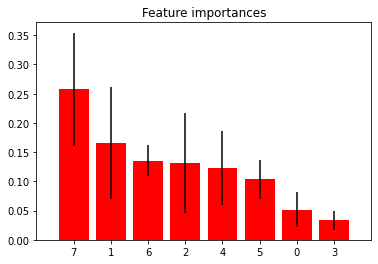

In [60]:
"""
 Feature Importance Forest of Trees
"""
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

def printColumn(number):
  switcher = {
      0: "Full Name Words",
      1: "Bio Length",
      2: "External URL",
      3: "Private",
      4: "Business",
      5: "#Post",
      6: "#Followers",
      7: "#Following",
      8: "Delta",
  }
  return switcher.get(number, "Invalid Column")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], printColumn(indices[f])))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [61]:
"""
  Decision Tree Classifier
"""
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# Train and Test algorithms
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

print(clf.fit(X_train, y_train))

print("TRAIN SET", clf.score(X_train, y_train))
print("TEST  SET", clf.score(X_test, y_test))

804 804
396 396
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
TRAIN SET 1.0
TEST  SET 0.9570707070707071
